# AUTHOR - TANUJ

# LetsGrowMore Internship

# TASK -  Prediction using Decision Tree Algorithm

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Getting the data

In [2]:
iris=pd.read_csv(r"C:\Users\ASUS--VIVOBOOK\Downloads\Iris dataset.csv")

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# visualizing the data 

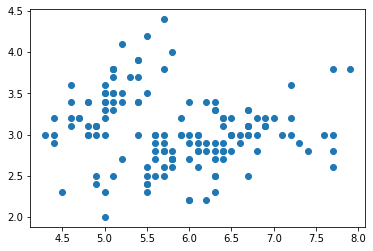

In [8]:
plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'])

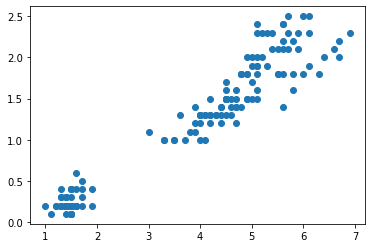

In [9]:
plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'])

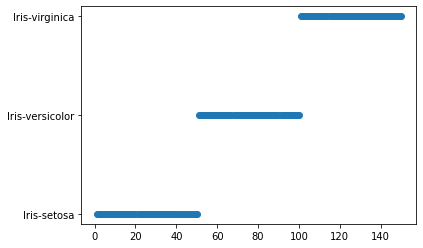

In [10]:
plt.scatter(iris['Id'],iris['Species'])

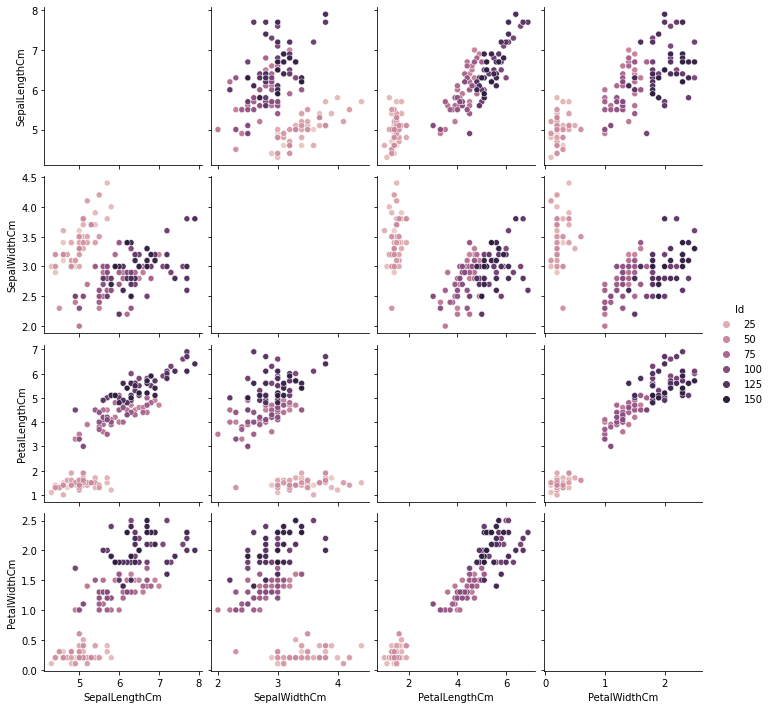

In [11]:
sns.pairplot(iris, hue='Id')

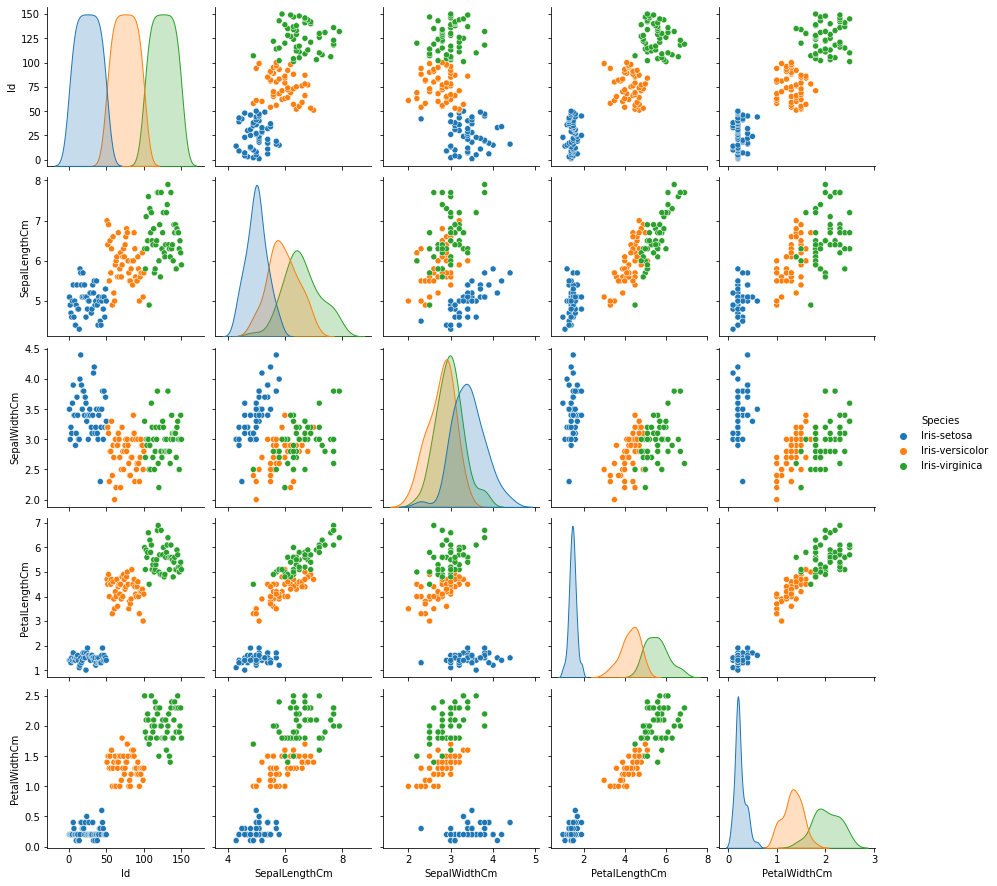

In [12]:
sns.pairplot(iris, hue='Species')

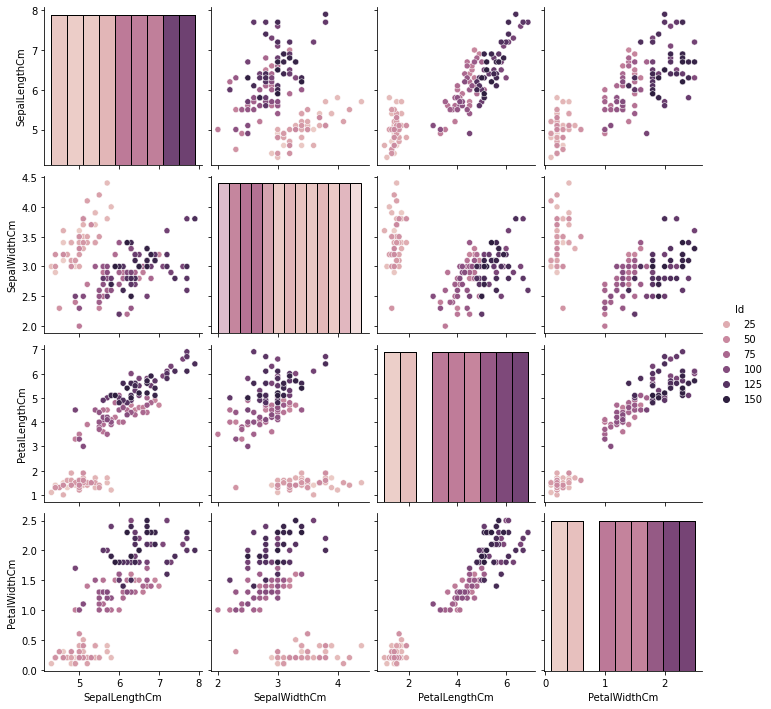

In [13]:
sns.pairplot(iris, hue="Id", diag_kind="hist")

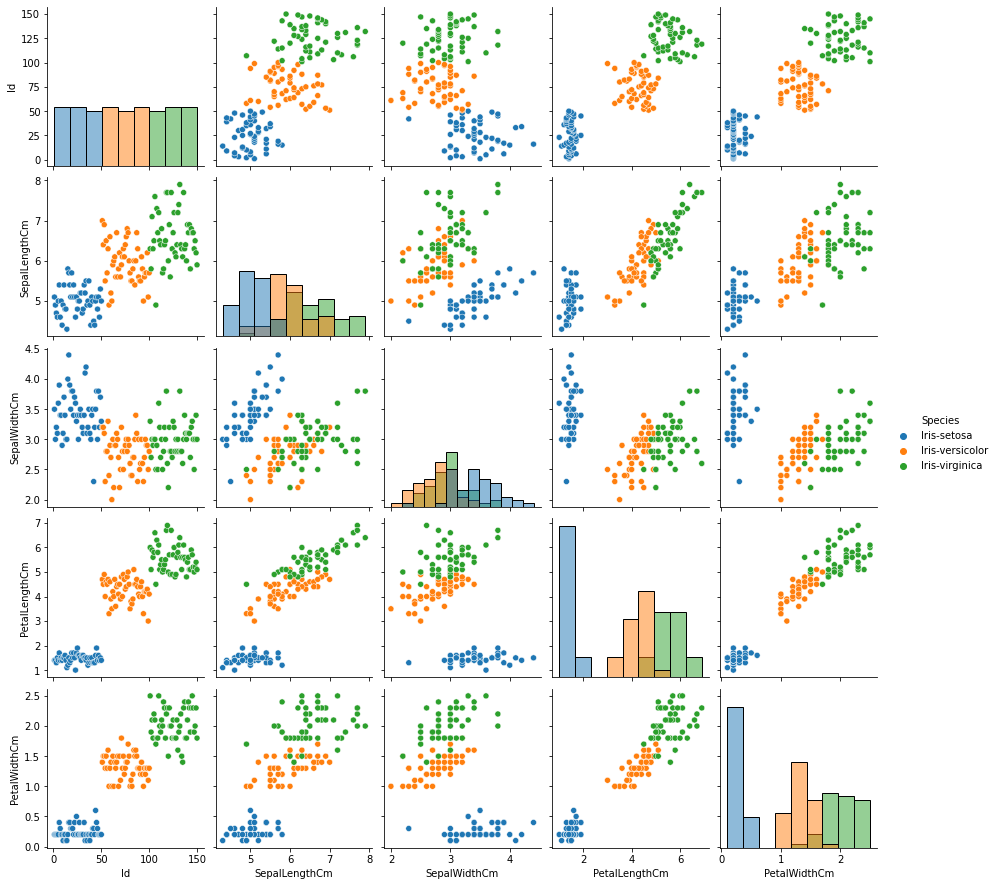

In [14]:
sns.pairplot(iris, hue="Species", diag_kind="hist")

# CORRELATION MATRIX 

In [15]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# HEATMAP

<AxesSubplot:>

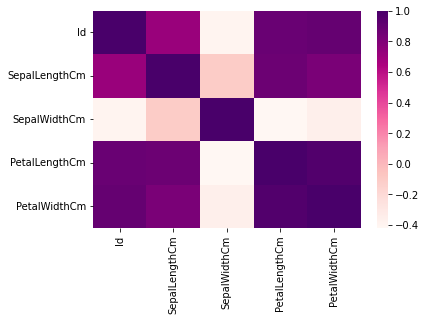

In [16]:
sns.heatmap(iris.corr(), cmap="RdPu")

# Data Preprocessing

In [17]:
target=iris['Species']
df=iris.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 5)

In [18]:
x=iris.iloc[:, [0,1,2,3]].values
LaEn=LabelEncoder()
iris['Species']=LaEn.fit_transform(iris['Species'])
y=iris['Species'].values
iris.shape

(150, 6)

# Training the model

#Spliting the data into Training and Testing set

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Trainging set:",x_train.shape)
print("Testing set:",x_test.shape)

Trainging set: (120, 4)
Testing set: (30, 4)


# Defining Decision Tree Algorithm

In [20]:
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


# Visualization of trained model

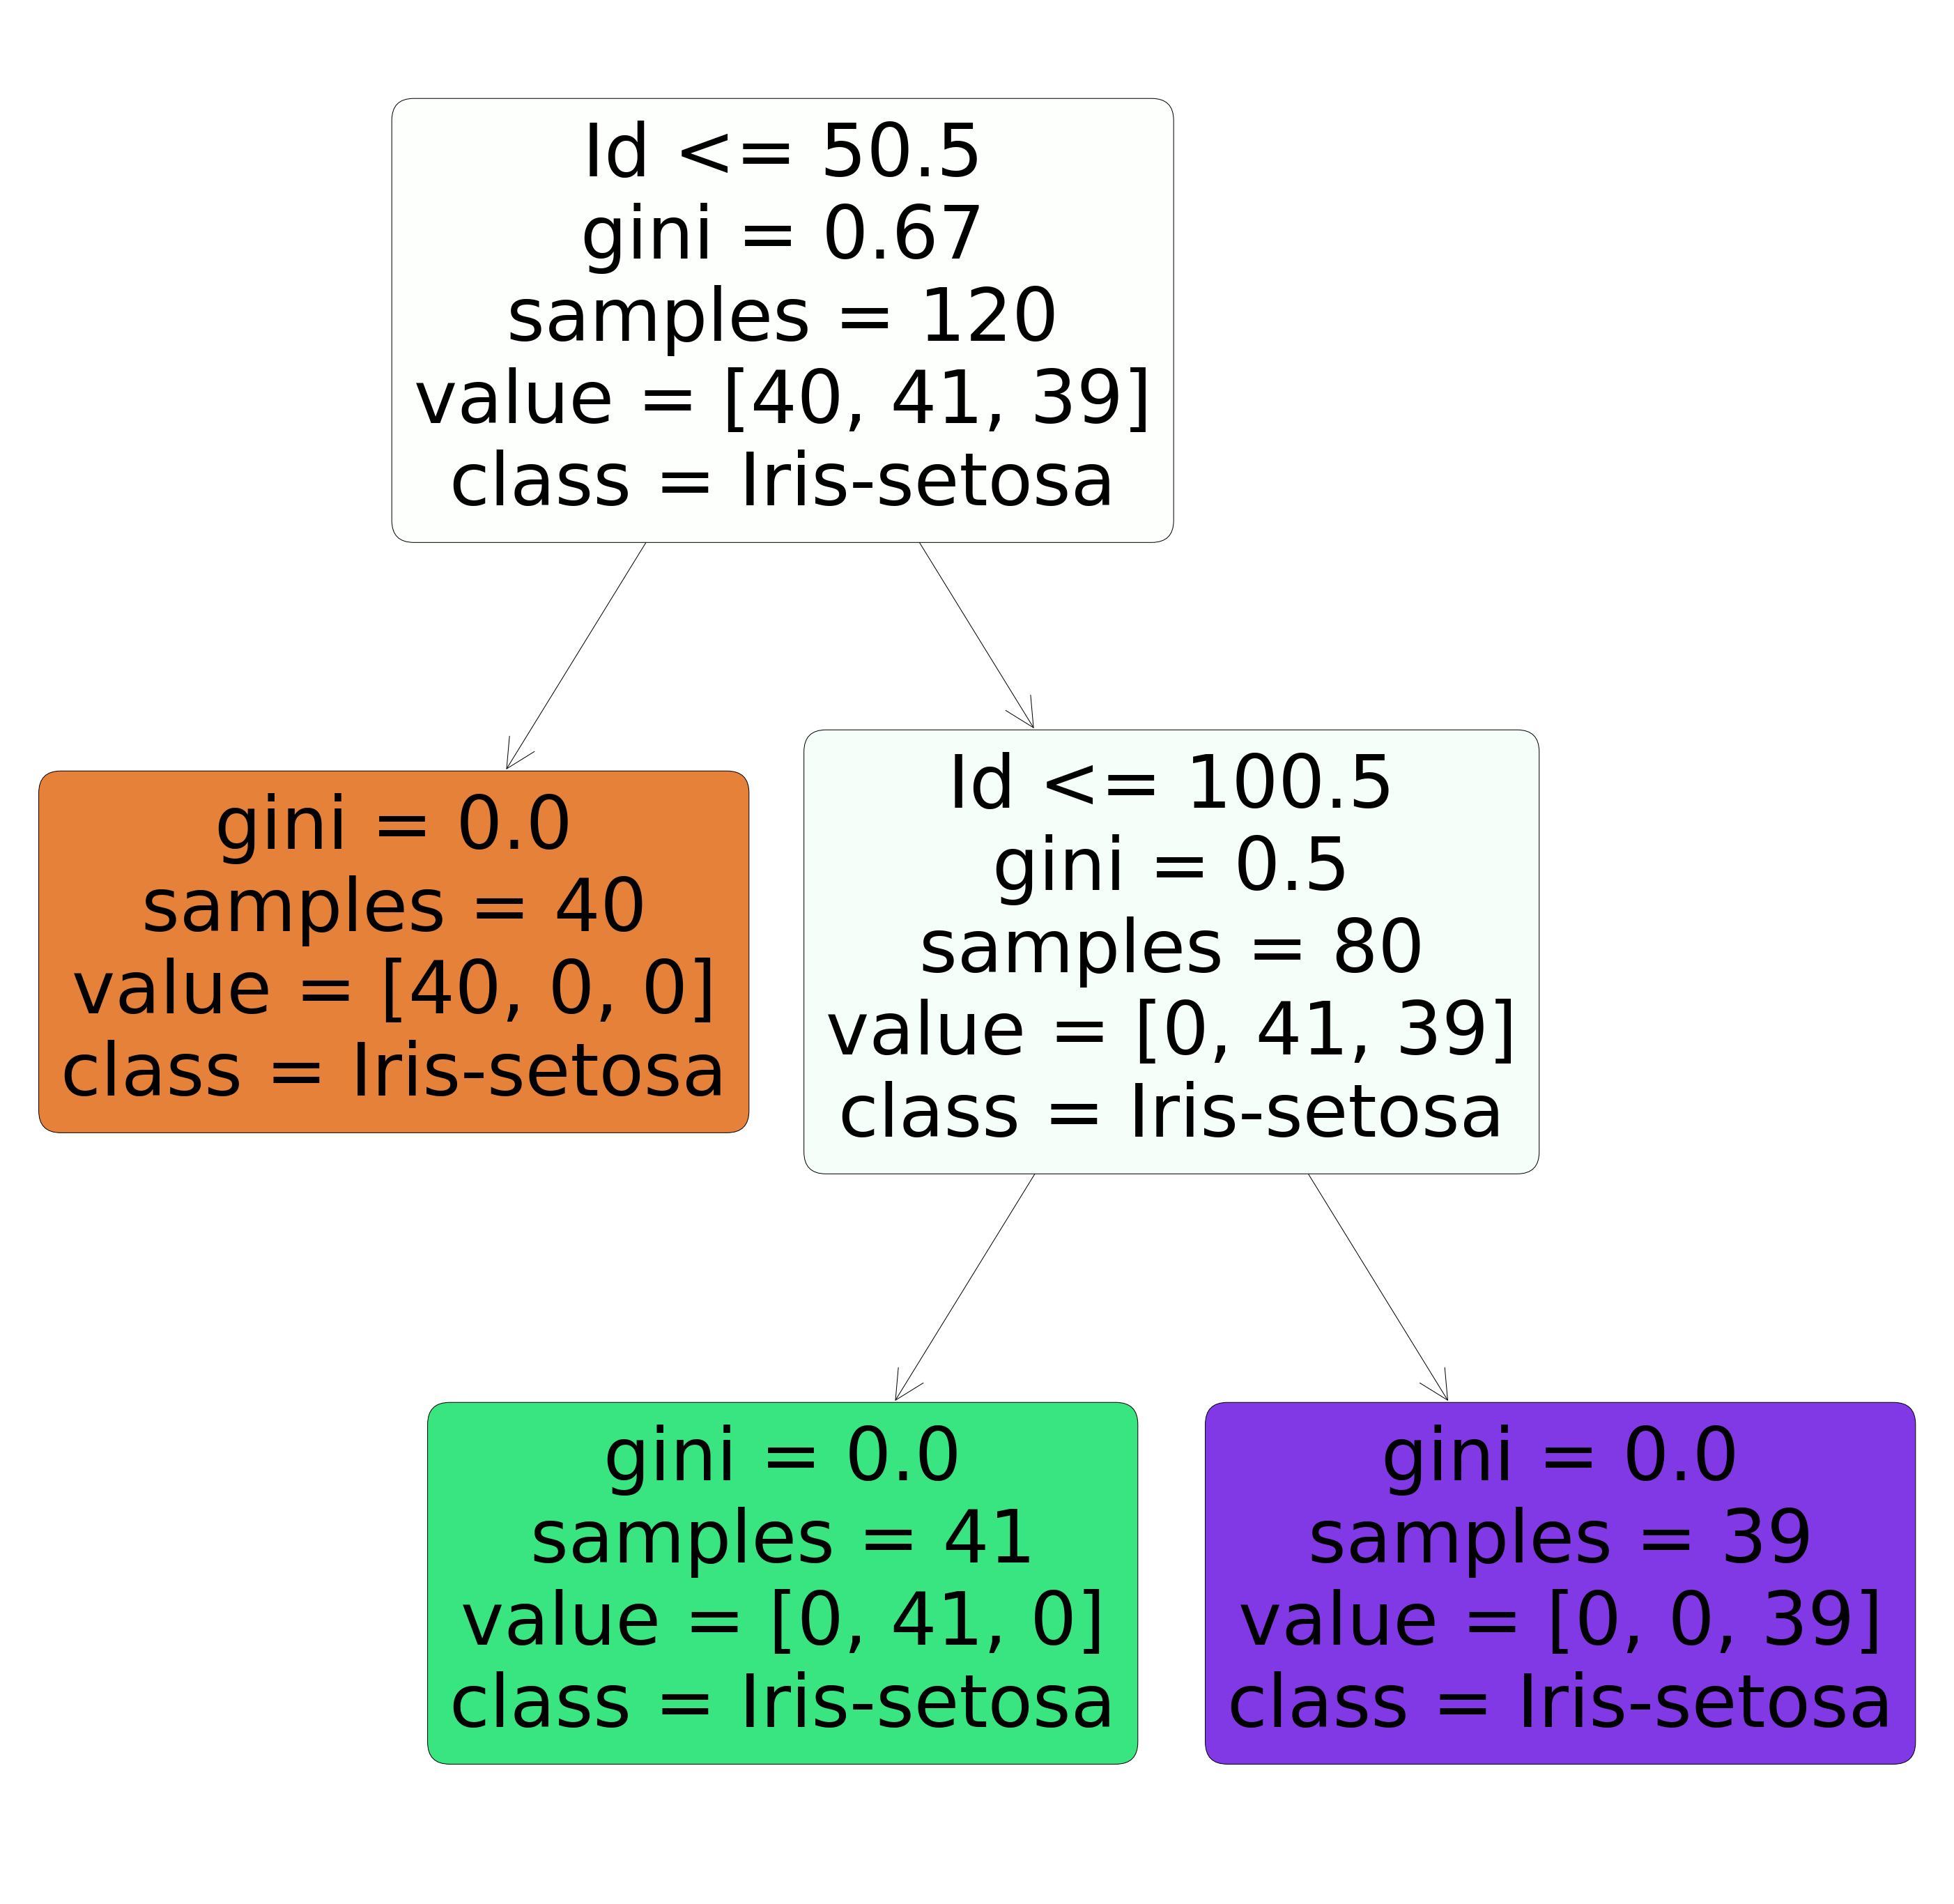

In [21]:
plt.figure(figsize=(50,50))
tree=plot_tree(d_tree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)

# Classification Report 

In [22]:
y_pred=d_tree.predict(x_test)
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# ACCURACY

In [23]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


# Confusion Matrix

In [24]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# TASK COMPLETED 

# THANKS & REGARDS

# TANUJ